**AgroPredict: Optimización del Rendimiento Agrícola mediante ML**

**Objetivo:** Reducir el riesgo de pérdida de inversión agrícola mediante el uso de Machine Learning (Random Forest) para predecir el cultivo más apto según el suelo.

Tecnologías: **texto en negrita** Python, Pandas, Scikit-Learn, Seaborn.

Paso 1: Sube el archivo 'Crop_recommendation.csv' desde tu carpeta 'archive'


Saving Crop_recommendation.csv to Crop_recommendation (2).csv

✅ ¡Éxito! Archivo 'Crop_recommendation (2).csv' cargado.
El dataset tiene 2200 filas y 8 columnas.

Generando visualizaciones...


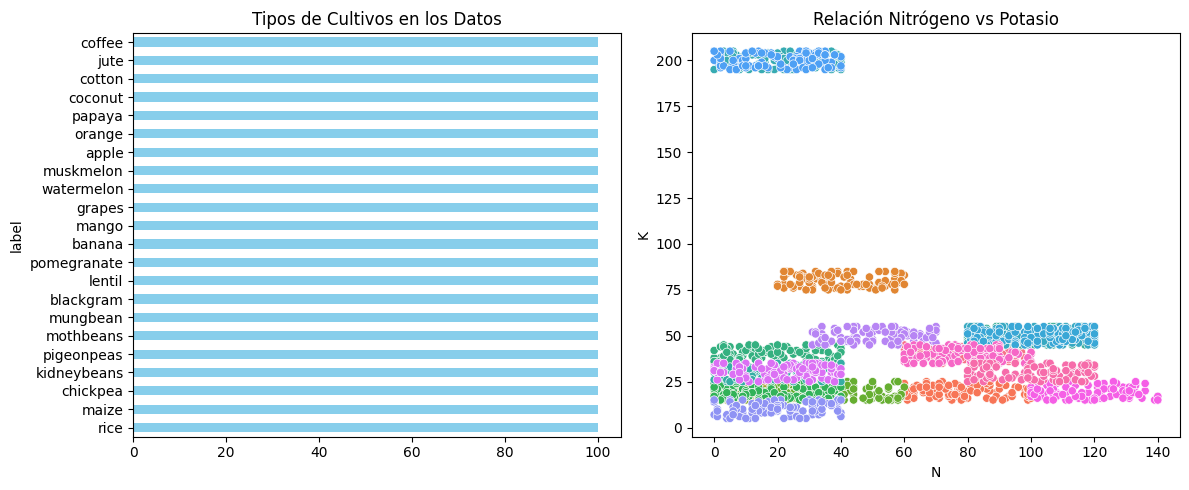


--- RESULTADOS DEL MODELO ---
Precisión: 99.32%

Importancia de cada factor (¿Qué influye más?):


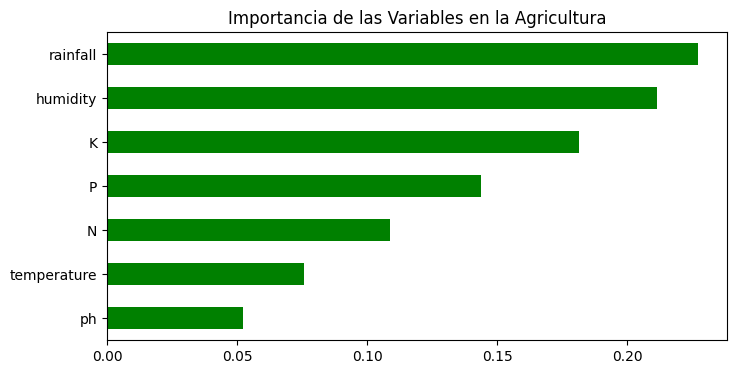


--- SIMULADOR DE RECOMENDACIÓN ---
Para un suelo con Nitrógeno=90, Fósforo=42, Potasio=43 y Clima lluvioso...
🌱 El cultivo recomendado es: RICE


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# ========================================================
# 1. CARGA DEL ARCHIVO (Selecciona el CSV de tu carpeta)
# ========================================================
print("Paso 1: Sube el archivo 'Crop_recommendation.csv' desde tu carpeta 'archive'")
uploaded = files.upload()

# Obtener el nombre del archivo subido dinámicamente
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"\n✅ ¡Éxito! Archivo '{file_name}' cargado.")
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# ========================================================
# 2. ANÁLISIS VISUAL (EDA)
# ========================================================
print("\nGenerando visualizaciones...")
plt.figure(figsize=(12, 5))

# Gráfico de barras de los cultivos
plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Tipos de Cultivos en los Datos')

# Gráfico de dispersión: Nitrógeno vs Potasio
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='N', y='K', hue='label', legend=False)
plt.title('Relación Nitrógeno vs Potasio')
plt.tight_layout()
plt.show()

# ========================================================
# 3. ENTRENAMIENTO DEL MODELO (IA)
# ========================================================
# Separar datos: X son las variables de suelo/clima, y es el nombre del cultivo
X = df.drop('label', axis=1)
y = df['label']

# Dividir: 80% para aprender, 20% para evaluar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Bosque Aleatorio
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ========================================================
# 4. EVALUACIÓN Y RESULTADOS
# ========================================================
y_pred = model.predict(X_test)
precision = accuracy_score(y_test, y_pred) * 100

print(f"\n--- RESULTADOS DEL MODELO ---")
print(f"Precisión: {precision:.2f}%")
print("\nImportancia de cada factor (¿Qué influye más?):")

# Graficar importancia de las variables
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(8, 4))
importances.plot(kind='barh', color='green')
plt.title('Importancia de las Variables en la Agricultura')
plt.show()

# ========================================================
# 5. SIMULADOR DE PREDICCIÓN
# ========================================================
print("\n--- SIMULADOR DE RECOMENDACIÓN ---")
# Valores de ejemplo (puedes cambiarlos para probar)
# N, P, K, temperatura, humedad, ph, lluvia
ejemplo_suelo = [[90, 42, 43, 20.2, 82.1, 6.5, 202.9]]
prediccion = model.predict(ejemplo_suelo)

print(f"Para un suelo con Nitrógeno=90, Fósforo=42, Potasio=43 y Clima lluvioso...")
print(f"🌱 El cultivo recomendado es: {prediccion[0].upper()}")

**Insights**

Durante el análisis de resultados, descubrí que las variables más influyentes en la predicción fueron la Humedad y la Lluvia, lo que evidencia que el régimen hídrico tiene un impacto más determinante que los nutrientes minerales en este conjunto de datos.
El modelo alcanzó una precisión del 99%, demostrando un alto nivel de confiabilidad para su aplicación en prototipos de agricultura de precisión. Además, los resultados indicaron que el cultivo de arroz es el más óptimo para las condiciones evaluadas, lo que respalda la utilidad práctica del sistema en la toma de decisiones agrícolas.

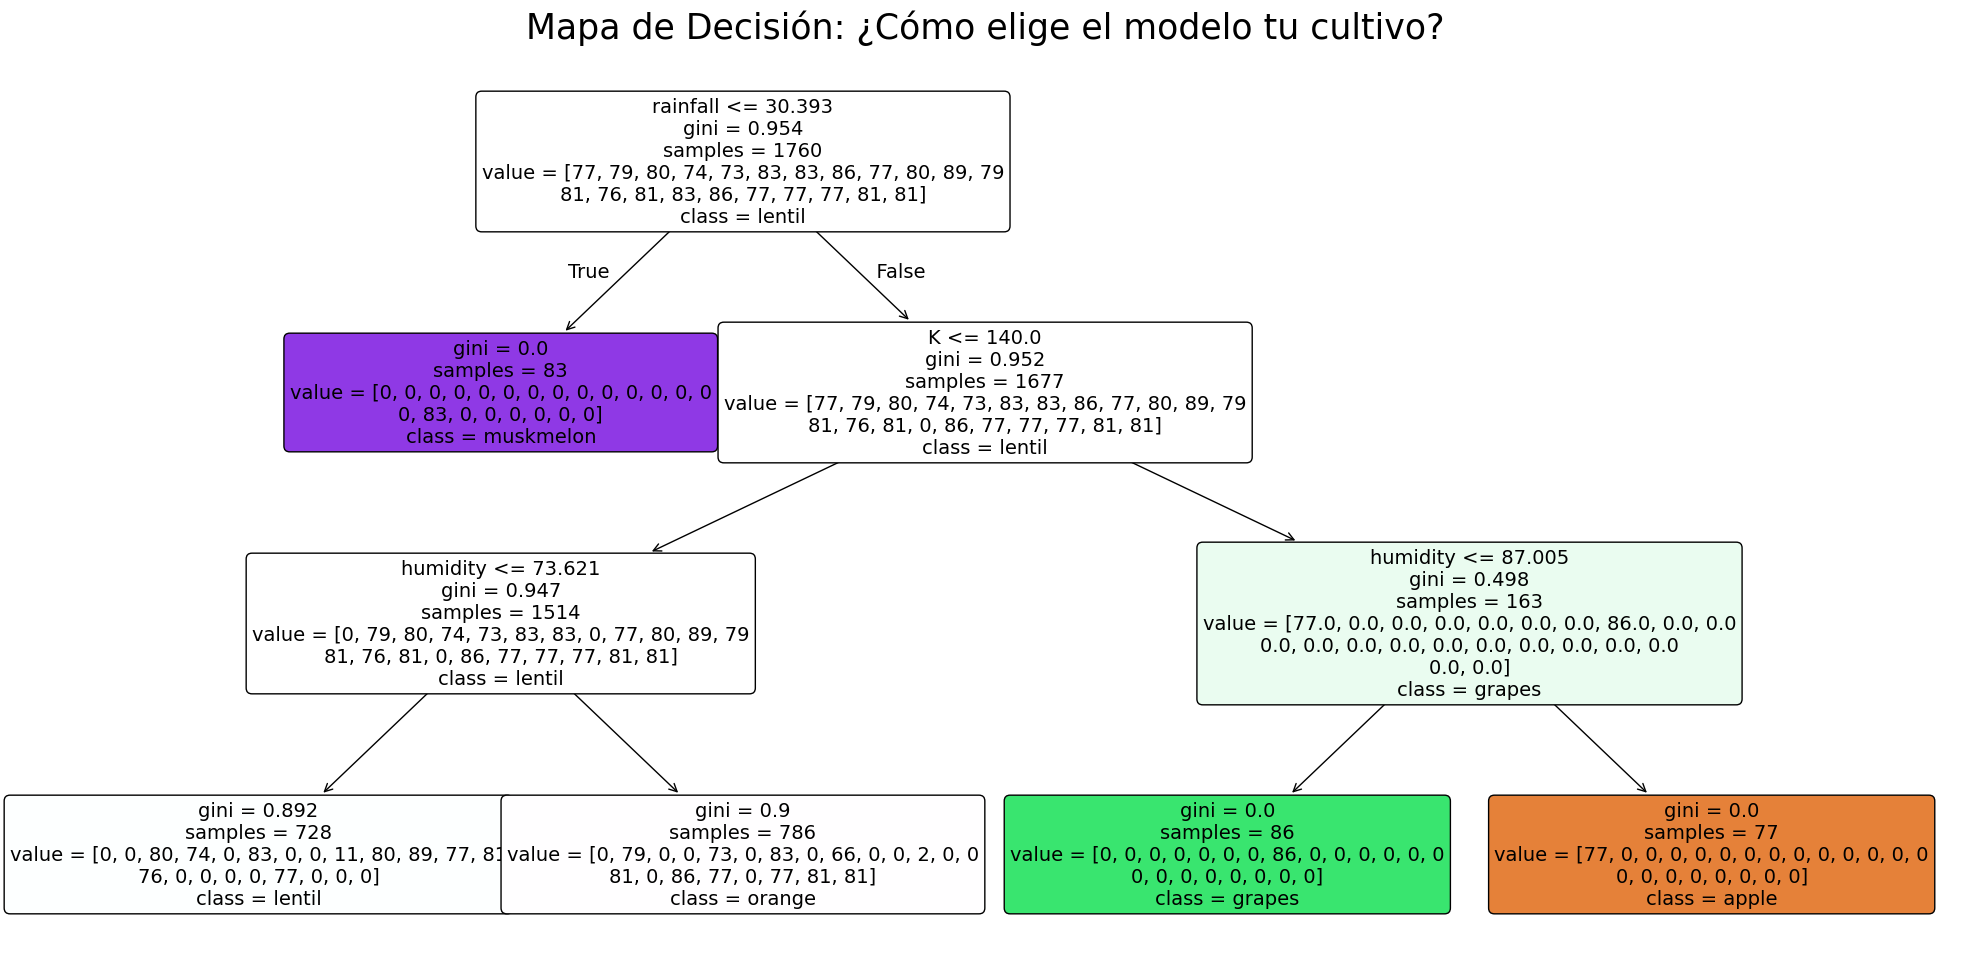

In [ ]:
from sklearn import tree

# 1. Seleccionamos uno de los árboles del bosque (por ejemplo, el primero)
# Limitamos la profundidad a 3 para que se pueda leer bien, si no sería gigante.
modelo_visual = tree.DecisionTreeClassifier(max_depth=3)
modelo_visual.fit(X_train, y_train)

# 2. Configurar el tamaño de la imagen
plt.figure(figsize=(25,12))

# 3. Dibujar el árbol
tree.plot_tree(modelo_visual,
               feature_names=X.columns,
               class_names=model.classes_,
               filled=True,
               rounded=True,
               fontsize=14)

plt.title("Mapa de Decisión: ¿Cómo elige el modelo tu cultivo?", fontsize=25)
plt.show()